## Question:
In the industrial setting represented by the Bayesian network, suppose the
condition of the machine's health is categorized as 'Good,' the maintenance action
planned is 'Scheduled,' and it's noted that the operator is 'Not Present' at the time.
Under these specific circumstances, can you determine the likelihood or probability
of an event where the production process experiences downtime? This probability
quantifies the chances of production disruption given the health of the machine, the
scheduled maintenance, and the absence of the operator.

CPD for MachineHealth:
+------------------+-----+
| MachineHealth(0) | 0.8 |
+------------------+-----+
| MachineHealth(1) | 0.2 |
+------------------+-----+

CPD for ProductionDowntime:
+-----------------------+-----+----------------------+
| MachineHealth         | ... | MachineHealth(1)     |
+-----------------------+-----+----------------------+
| MaintenanceAction     | ... | MaintenanceAction(1) |
+-----------------------+-----+----------------------+
| OperatorPresence      | ... | OperatorPresence(1)  |
+-----------------------+-----+----------------------+
| ProductionDowntime(0) | ... | 0.3                  |
+-----------------------+-----+----------------------+
| ProductionDowntime(1) | ... | 0.7                  |
+-----------------------+-----+----------------------+

CPD for MaintenanceAction:
+----------------------+-----+
| MaintenanceAction(0) | 0.7 |
+----------------------+-----+
| MaintenanceAction(1) | 0.3 |
+----------------------+-----+

CPD for OperatorPresence

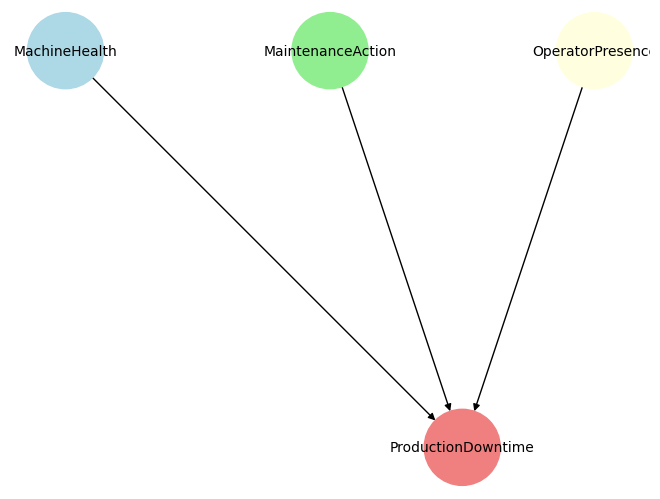

In [4]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination
# Define the structure of the Bayesian network
model = BayesianNetwork([
('MachineHealth', 'ProductionDowntime'), # MachineHealth is the parent of ProductionDowntime
('MaintenanceAction', 'ProductionDowntime'), # MaintenanceAction is the parent of ProductionDowntime
('OperatorPresence', 'ProductionDowntime') # OperatorPresence is the parent of ProductionDowntime
                          ])
# Define conditional probability distributions (CPDs)
machine_health_cpd = TabularCPD(variable='MachineHealth', variable_card=2,values=[[0.8], [0.2]])
maintenance_action_cpd = TabularCPD(variable='MaintenanceAction',variable_card=2, values=[[0.7], [0.3]])
operator_presence_cpd = TabularCPD(variable='OperatorPresence',variable_card=2, values=[[0.9], [0.1]])
# CPD for ProductionDowntime with all parents
production_downtime_cpd = TabularCPD(variable='ProductionDowntime',variable_card=2, values=[[0.95, 0.8, 0.9, 0.7, 0.7, 0.4, 0.5, 0.3], [0.05, 0.2, 0.1, 0.3, 0.3,0.6, 0.5, 0.7]],evidence=['MachineHealth', 'MaintenanceAction','OperatorPresence'], evidence_card=[2, 2, 2])
# Associate CPDs with the model
model.add_cpds(machine_health_cpd, maintenance_action_cpd,
operator_presence_cpd, production_downtime_cpd)
# Print CPDs
for node in model.nodes():
  print(f"CPD for {node}:\n{model.get_cpds(node)}\n")
# Check if the model is valid
print("Model is valid?", model.check_model())
# Create a directed graph from the model's edges
G = nx.DiGraph(model.edges())
# Observe that the machine health is 'Good' (0), the maintenance action is 'Scheduled' (0),
# and the operator is not present (1)

evidence = {'MachineHealth': 0, 'MaintenanceAction': 0, 'OperatorPresence': 1}
# Create a VariableElimination object for inference
inference = VariableElimination(model)
# Perform inference to calculate probabilities
prob_downtime_given_evidence =inference.query(variables=['ProductionDowntime'], evidence=evidence)
# Print the results
print("\nProbability of Production Downtime given MachineHealth='Good', MaintenanceAction='Scheduled', and OperatorPresence='Not Present':")
print(prob_downtime_given_evidence)
# Specify a custom layout for the nodes
layout = {
'MachineHealth': (0, 0), # Position of 'MachineHealth' node
'MaintenanceAction': (1, 0), # Position of 'MaintenanceAction' node
'OperatorPresence': (2, 0), # Position of 'OperatorPresence' node
'ProductionDowntime': (1.5, -1) # Position of 'ProductionDowntime' node
}
# Create a color dictionary
color_map = {'MachineHealth': 'lightblue', 'MaintenanceAction': 'lightgreen',
'OperatorPresence': 'lightyellow', 'ProductionDowntime': 'lightcoral'}
# Draw the graph with the specified layout and node colors
nx.draw(G, layout, with_labels=True, node_size=3000,
node_color=[color_map.get(node, 'lightgray') for node in G.nodes()], font_size=10)
plt.show()

In [3]:
!pip install pgmpy
!pip install networkx
!pip install matplotlib
!pip install pgmpy.models
!pip install pgmpy.factors
!pip install pgmpy.inference

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.3 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement pgmpy.models (from versions: none)
ERROR: No matching distribution found for pgmpy.models
ERROR: Could not find a version that satisfies the requirement pgmpy.factors (from versions: none)
ERROR: No matching distribution found for pgmpy.factors
ERROR: Could not find a version that satisfies the requirement pgmpy.inference (from versions: none)
ERROR: No matching distribution found for pgmpy.inference
